In [1]:
%compiler: gfortran
use, intrinsic :: iso_fortran_env
print *, compiler_version()
end

 GCC version 12.2.0


In [2]:
%compiler: gfortran .f
      PARAMETER(N = 100)
      OPEN(9, FILE = 'SINCOS.XY')
      PI = 4.0 * ATAN(1.0)
      DO 10 I = 0, N
        X = 2.0 * I * PI / N  
        WRITE(9, *) X, SIN(X), COS(X)
   10 CONTINUE
      STOP 'NORMAL TERMINATION'
      END

In [3]:
%compiler: gfortran .f
      PARAMETER(N = 100)
      OPEN(9, FILE = 'SINCOS.XY')
      PI = 4.0 * ATAN(1.0)
      DO 10 I = 0, N
        X = 2.0 * I * PI / N  
        WRITE(9, *) X, SIN(X), COS(X)
   10 CONTINUE
      STOP 'NORMAL TERMINATION'
      END

STOP NORMAL TERMINATION


In [4]:
%writefile: Laurence_Sterne.txt
“Cupid! Cupid! prince of Gods and men.”
Laurence Sterne. (1713–1768).  A Sentimental Journey through France and Italy.

write to file:Laurence_Sterne.txt

In [6]:
%compiler: gcc .c
#include <stdio.h>
int main(void) {
    printf("Hello world\n");
    return 0;  
}

Hello world


In [8]:
%compiler: g++ .c++
#include <iostream>

using namespace std;

int main() {
    std::cout << "Hello World!" << std::endl;
    return 0;
}

Hello World!


In [9]:
%compiler: gfortran
%module: m
%fcflags: -O2
!
! The Sieve of Eratosthenes
!
module m_eratos
    implicit none
contains
    integer function nprimes(n) 
        integer, intent(in) :: n
        logical, allocatable :: tab(:)
        integer :: i
        allocate(tab(2:n), source = .true.)
        do i = 2, int(sqrt(real(n)))
            if (tab(i)) tab(i**2::i) = .false.
        end do
        nprimes = count(tab)
    end function nprimes    
end module m_eratos

[ifort kernel] module objects created successfully: m.o

In [10]:
%compiler: gfortran
%fcflags: m.o
program test
    use m_eratos
    implicit none
    integer :: i 
    do i = 1, 8
       write(*, *) i, 10**i, nprimes(10**i), nint(10**i / log(10.0**i))
       write(9, *) i, 10**i, nprimes(10**i), nint(10**i / log(10.0**i))
    end do
end program test

           1          10           4           4
           2         100          25          22
           3        1000         168         145
           4       10000        1229        1086
           5      100000        9592        8686
           6     1000000       78498       72382
           7    10000000      664579      620421
           8   100000000     5761455     5428681


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
_fig = plt.figure( args )
...

( user inputs are executed by Python's exec command )

...

plt.show()

In [12]:
%compiler: gfortran
%fcflags: m.o -O2  
program prime
    use m_eratos
    implicit none
    integer :: i 
    open(9, file = 'primes.csv')
    write(9, '(5g0)') 'n', ',', 'primes', ',', 'n/log(n)'
    do i = 2, 501
      ! write(*, *) i, ',', nprimes(i)
       write(9, '(5g0)') i, ',', nprimes(i), ',', i / log(real(i)) 
    end do
    stop 'normal end'
end program prime

STOP normal end


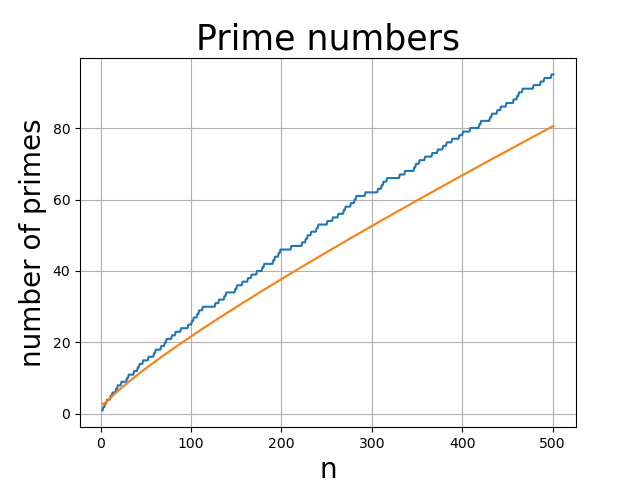

In [13]:
%fig:
x, y1, y2 = np.loadtxt('primes.csv', unpack = True, delimiter=',', skiprows=1) 
plt.grid(which='both')
plt.plot(x, y1)
plt.plot(x, y2)
plt.title('Prime numbers', fontsize = 25)
plt.xlabel('n', fontsize = 20)
plt.ylabel('number of primes', fontsize = 20)

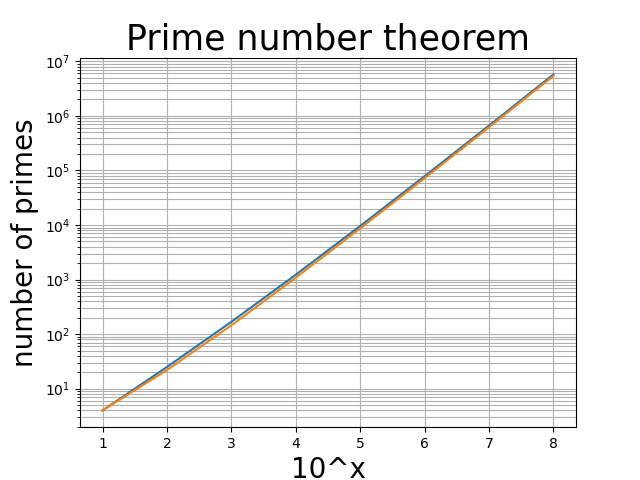

In [14]:
%fig:
x, y1, y2, y3 = np.loadtxt('fort.9', unpack = True)
plt.yscale('log')
plt.grid(which='both')
plt.plot(x, y2)
plt.plot(x, y3)
plt.title('Prime number theorem', fontsize = 25)
plt.xlabel('10^x', fontsize = 20)
plt.ylabel('number of primes', fontsize = 20)

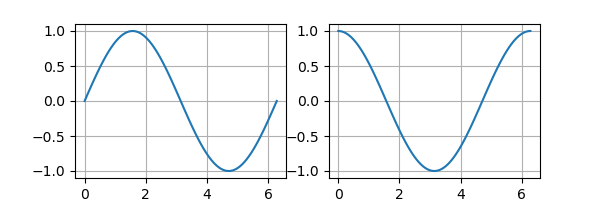

In [15]:
%fig:figsize=(6, 2)
x, y1, y2 = np.loadtxt('SINCOS.XY', unpack = True)
plt.subplot(1, 2, 1)
plt.grid(which='both')
plt.plot(x, y1)
plt.subplot(1, 2, 2)
plt.grid(which='both')
plt.plot(x, y2)

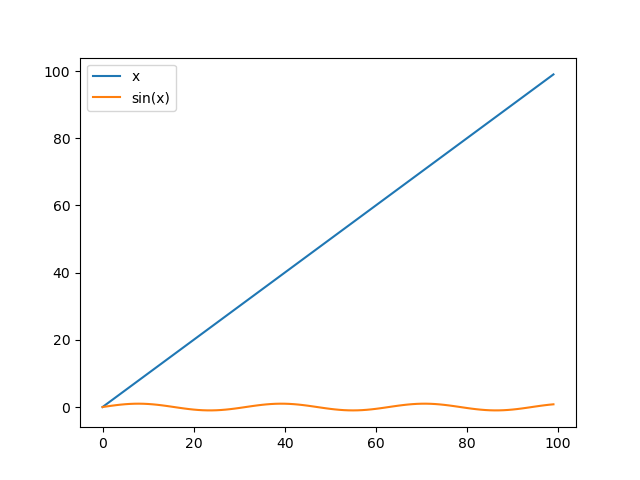

In [16]:
%fig:
import pandas as pd
ax = _fig.add_subplot(1, 1, 1)

x = np.arange(100)
df = pd.DataFrame({'x': x, 'sin(x)': np.sin(x / 5)})
df.plot(ax=ax)

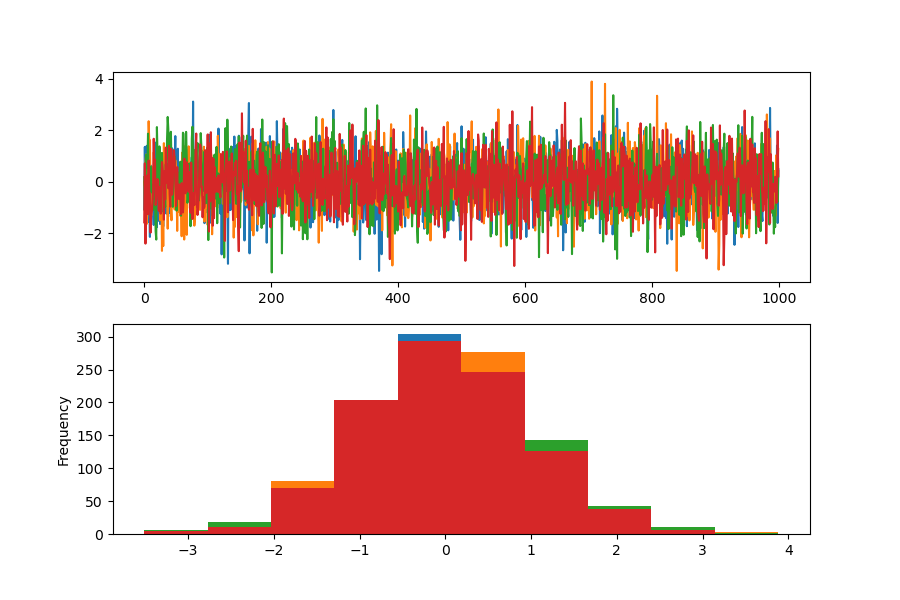

In [17]:
%fig:
from pandas import *
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(9, 6))
_fig = fig
# Multiple assignment is not allowed for _fig.

df = DataFrame(np.random.randn(1000, 4))
df.plot(ax=axes[0], legend=False)
df.plot(ax=axes[1], legend=False, kind='hist')

In [18]:
%py:
from sympy import *
x = Symbol('x')
bernoulli_gen = x / (exp(x) - 1)
print bernoulli_gen

bernoulli_ser = series(bernoulli_gen , x, 0, 10).removeO()
btmp = Poly(bernoulli_ser, x).coeffs()
bernoulli = [0,0,0,0,0,0]

bernoulli[0] = factorial(0) * btmp[5]
bernoulli[1] = factorial(1) * btmp[4]
bernoulli[2] = factorial(2) * btmp[3]
bernoulli[3] = factorial(4) * btmp[2]
bernoulli[4] = factorial(6) * btmp[1]
bernoulli[5] = factorial(8) * btmp[0]

print bernoulli

x/(exp(x) - 1)
[1, -1/2, 1/6, -1/30, 1/42, -1/30]


In [19]:
%py:
x = 3+5
print x

8


In [20]:
%py:
x = range(5)
print x

range(0, 5)


In [21]:
%py:
for i in range(5): i = i + i
print (i)

8


In [22]:
%compiler: gfortran

program test_double_colon
    implicit none

    integer :: i
    real, dimension(100) :: tab

    tab (1::5) = 12345.0
        
    do i = 1, 5
        print *, tab(i)
    end do

end program test_double_colon

   12345.0000    
   0.00000000    
   0.00000000    
   0.00000000    
   0.00000000    


In [23]:
%compiler: gfortran

program kinds

    use iso_fortran_env
    implicit none
    print *, real_kinds
end program kinds

           4           8          10          16


In [24]:
%compiler: gfortran
%module: BMP
    module m_bmp
      use, intrinsic :: iso_fortran_env
      implicit none
      type :: t_bmp_file_header
        sequence  
        integer(int16) :: bfType = transfer('BM', 0_int16) ! BitMap
        integer(int32) :: bfSize          ! file size in bytes
        integer(int16) :: bfReserved1 = 0 ! always 0
        integer(int16) :: bfReserved2 = 0 ! always 0
        integer(int32) :: bfOffBits
      end type t_bmp_file_header
      !
      type :: t_bmp_info_header
        sequence
        integer(int32) :: biSize          = Z'28' ! size of bmp_info_header ; 40bytes 
        integer(int32) :: biWidth
        integer(int32) :: biHeight
        integer(int16) :: biPlanes        = 1 ! always 1
        integer(int16) :: biBitCount
        integer(int32) :: biCompression   = 0 ! 0:nocompression, 1:8bitRLE, 2:4bitRLE, 3:bitfield
        integer(int32) :: biSizeImage
        integer(int32) :: biXPelsPerMeter = 3780 ! 96dpi
        integer(int32) :: biYPelsPerMeter = 3780 ! 96dpi 
        integer(int32) :: biClrUsed       = 0
        integer(int32) :: biClrImportant  = 0 
      end type t_bmp_info_header
      !
      type :: t_rgb
        sequence
        integer(int8) :: ib, ig, ir
      end type t_rgb  
    contains   
      subroutine wr(bmp, fn)
        type(t_rgb), intent(in) :: bmp(:, :)
        character(len = *), intent(in) :: fn
        type(t_bmp_file_header) :: bmp_file_header
        type(t_bmp_info_header) :: bmp_info_header
        integer :: i, nx, ny
        nx = size(bmp, 1)
        ny = size(bmp, 2)
        bmp_file_header%bfSize      = 14 + 40 + 0 + (3 * nx + mod(ny, 4)) * ny
        bmp_file_header%bfOffBits   = 14 + 40
        bmp_info_header%biWidth     = nx
        bmp_info_header%biHeight    = ny
        bmp_info_header%biBitCount  = 24 
        bmp_info_header%biSizeImage = (3 * nx + mod(ny, 4)) * ny
        open(9, file = fn // '.bmp', access = 'stream', status = 'unknown')
        write(9) bmp_file_header
        write(9) bmp_info_header
        write(9) (bmp(:, i), repeat(achar(0), mod(nx, 4)), i = 1, ny)
        close(9)
      end subroutine wr  
    end module m_bmp

/home/haxor/Documents/Engineering/Jupyter-Notebooks/IFort_Practice/temp/tmpuqlwbts7.f90:15:43:

   15 |         integer(int32) :: biSize          = Z'28' ! size of bmp_info_header ; 40bytes
      |                                           1
Error: BOZ literal constant at (1) is neither a data-stmt-constant nor an actual argument to INT, REAL, DBLE, or CMPLX intrinsic function [see ‘-fno-allow-invalid-boz’]
/home/haxor/Documents/Engineering/Jupyter-Notebooks/IFort_Practice/temp/tmpuqlwbts7.f90:15:43:

   15 |         integer(int32) :: biSize          = Z'28' ! size of bmp_info_header ; 40bytes
      |                                           1
Error: Cannot convert BOZ to INTEGER(4) at (1)
/home/haxor/Documents/Engineering/Jupyter-Notebooks/IFort_Practice/temp/tmpuqlwbts7.f90:15:43:

   15 |         integer(int32) :: biSize          = Z'28' ! size of bmp_info_header ; 40bytes
      |                                           1
Error: Cannot convert BOZ to INTEGER(4) at (1)


[ifort kernel] fortran exited with code 1, the executable will not be executed

In [25]:
%compiler: gfortran
%fcflags: BMP.o
    module m_mandel
      use, intrinsic :: iso_fortran_env
      implicit none
      integer, parameter :: kd = real64
      integer, parameter :: maxiter = 255
    contains
      pure elemental integer function mandel(c)
        complex(kd), intent(in) :: c
        complex(kd) :: z
        z = c
        do mandel = maxiter, 1, -1
          if (abs(z) > 2.0_kd) exit
          z = z**2 + c
        end do 
      end function mandel
    end module m_mandel


    program mandelbrot
      use m_bmp 
      use m_mandel
      implicit none
      complex(kd), allocatable :: c(:, :)
      type(t_rgb), allocatable :: bmp(:, :)
      integer  :: ix, iy, nx, ny
      real(kd) :: xmin, ymin, xmax, ymax
      xmin = 0.15_kd
      xmax = 0.25_kd
      ymin = 0.50_kd
      ymax = 0.60_kd
      nx = 320
      ny = 320
      allocate( c(nx, ny) )
      forall (ix = 1:nx, iy = 1:ny) c(ix, iy) = cmplx(pos(ix, nx, xmin, xmax), pos(iy, ny, ymin, ymax)) 
      bmp = to_rgb( mandel(c) ) 
      call wr(bmp, 'mandel')
      stop 'normal end'
    contains
      pure real(kd) function pos(i, n, rmin, rmax) 
        integer , intent(in) :: i, n
        real(kd), intent(in) :: rmin, rmax
        pos = (rmax - rmin) / (n - 1) * i + rmin
      end function pos
      !
      pure elemental type(t_rgb) function to_rgb(k)
        integer, intent(in) :: k
        to_rgb = t_rgb(10 * k,  k, 5 * k)
      end function to_rgb
    end program mandelbrot

/home/haxor/Documents/Engineering/Jupyter-Notebooks/IFort_Practice/temp/tmpijrohquh.f90:20:11:

   20 |       use m_bmp
      |           1
Fatal Error: Cannot open module file ‘m_bmp.mod’ for reading at (1): No such file or directory
compilation terminated.


[ifort kernel] fortran exited with code 1, the executable will not be executed

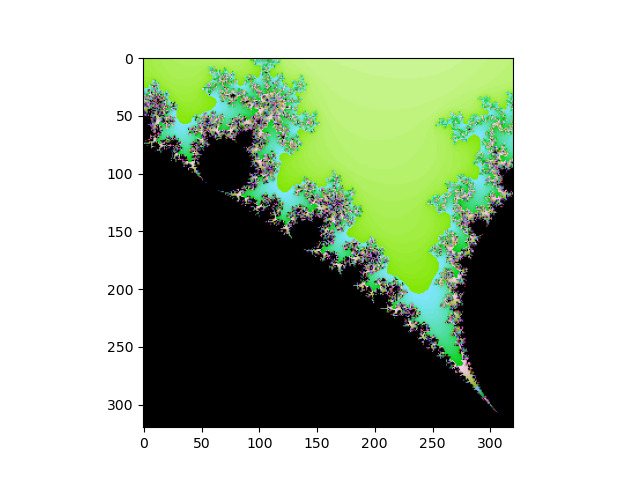

In [26]:
%fig:
from PIL import Image
im1 = Image.open('mandel.bmp')
plt.imshow(im1)

In [ ]:
print ("this is a test")

In [28]:
%compiler: gfortran

program resolver_output

    implicit none
    
    !! Define constants
    real, parameter :: exc_amplitude_rms = 4.0
    real, parameter :: pi = 4 * atan(1.0)
    integer, parameter :: num_steps = 360
    
    !! Define variables
    real :: exc_amplitude_peak
    real :: deg_to_rad
    
    !! Define array that holds resolver output amplitude for every degree of shaft rotation
    real, dimension(num_steps) :: exc_amplitude
    
    !! Define counter variable
    integer :: i = 0
    
    !! Convert RMS to peak
    exc_amplitude_peak = exc_amplitude_rms * sqrt(2.0)
    
    !! Create output file, which will be written in CSV format
    open (9, file='resolver_exc.csv')
    
    !! Write out header names to file
    write (9, '(5g0)') 'Shaft Angle[degrees]', ',', 'Shaft Angle[radians]', ',', 'Excitation Amplitude (sin(shaft angle))'
    
    !! Loop through 360 degrees.  For each degree, convert degrees to radians, take sine of radians, and write out to file.
    do i = 1, num_steps
        deg_to_rad = i * (pi/180.0)
        exc_amplitude(i) = exc_amplitude_peak * sin(deg_to_rad)
        !! Line below for diag
        !! print *, exc_amplitude(i)
        write (9, '(5g0)') i, ',', deg_to_rad, ',', exc_amplitude(i)
    end do
    
    !! Print out the screen that program executed normally
    stop 'normal end'
    
end program resolver_output

STOP normal end


The resolvers excitation ampitude is:

$$
            Resolver\>Output=5.6568\>V_{rms}
$$

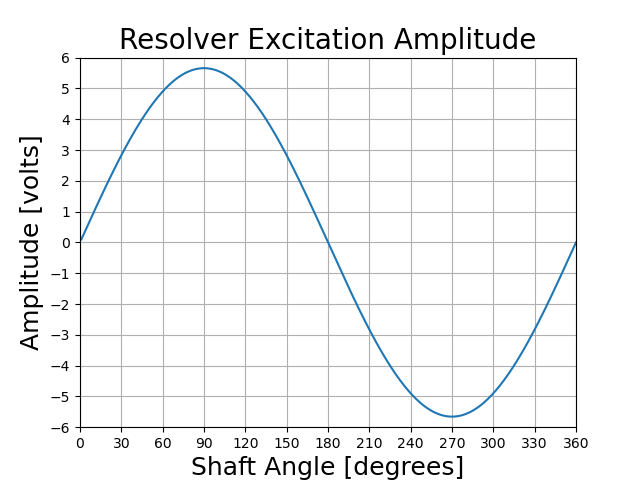

In [29]:
%fig:
deg, rad, amp = np.loadtxt('resolver_exc.csv', unpack = True, delimiter=',', skiprows=1)
plt.plot(deg, amp)
plt.grid(axis='both')
plt.xlim([0, 360])
plt.ylim([-6,6])
plt.xticks(np.arange(0, 361, 30.0))
plt.yticks(np.arange(-6, 6.1, 1))
plt.title('Resolver Excitation Amplitude', fontsize = 20)
plt.xlabel('Shaft Angle [degrees]', fontsize = 18)
plt.ylabel('Amplitude [volts]', fontsize = 18)

Read in the Resolver excitation waveform.

In [36]:
%compiler: gfortran

program resolver_feedback_output

    implicit none
    
    !! Define constants ************************************************
    
    !! Feedback gain in [V/V]
    real, parameter :: feedback_gain = 0.3
    
    !! Feedback voltage offset in [V]
    real, parameter :: feedback_offset = 2.5
    
    !! Define value of pi
    real, parameter :: pi = 4 * atan(1.0)
    
    !! Define granularity of steps.  In this case we are stepping 1 degree / step
    integer, parameter :: num_steps = 360
    
    !! End definition of constant ***************************************
    
    
    !! Define variables **************************************************
    real :: exc_amplitude_peak
    real :: deg_to_rad
    real :: deg
    character(len=80) :: heading1, heading2, heading3
    !! End definition of variables ***************************************
    
    !! Array definitions *************************************************
    
    !! Define array that holds resolver output amplitude for every degree of shaft rotation
    real, dimension(num_steps) :: exc_amplitude
    
    !! Define arrays (sin and cos) that hold the feedback circuits output 
    real, dimension(num_steps) :: feedback_amplitude
    
    !! End array definitions *********************************************
    
    !! Define counter variable
    integer :: i = 0
    
    !! Code Section *****************************************************
    !! Algorithm
    !! Open resolver excitation CSV file as readable
    !! Open resolver feedback circuit output file as writeable
    !! Read first row and discard since it contains headings.  This will advance the file pointer
    !! Begin loop
    !!     Read data from file into three variables: exc_deg, exc_rad, and exc_amp (excitation degrees, radians and amplitude)
    !!     Apply gain and offset to excitation amplitude to get feedback circuit output amplitude
    !!     Write out degrees, radians and feedback circuit output to output file.
    !! End loop
    !! stop 'normal end'
    
    !! Open resolver excitation file as read-only, no wipe on open
    open (7, file='resolver_exc.csv', action='read', status='old')
    
    !! Write out header names to file
    !!write (9, '(5g0)') 'Shaft Angle[degrees]', ',', 'Shaft Angle[radians]', ',', 'Excitation Amplitude (sin(shaft angle))'
    read (7, '(3a)') heading1, heading2, heading3
    !!print *, heading1, heading2, heading3
    close (7)
    
    !! Loop through 360 degrees.  For each degree, convert degrees to radians, take sine of radians, and write out to file.
    do i = 1, num_steps
        deg_to_rad = i * (pi/180.0)
        exc_amplitude(i) = exc_amplitude_peak * sin(deg_to_rad)
        !!Line below for diag
        !!print *, exc_amplitude(i)
        write (9, '(5g0)') i, ',', deg_to_rad, ',', exc_amplitude(i)
    end do
    
    !! Print out the screen that program executed normally
    stop 'normal end'
    
end program resolver_feedback_output

STOP normal end
